In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input # Import Input layer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# features: ['BMI', 'Exercise_Level', 'Diet_Score', 'Age', 'Gender']
# binary target: 0 = Non-Obese, 1 = Obese.

np.random.seed(42)
num_samples = 1000
BMI = np.random.normal(25, 5, num_samples)  # BMI values
Exercise_Level = np.random.randint(0, 5, num_samples)  # Exercise level (0-4 scale)
Diet_Score = np.random.randint(0, 10, num_samples)  # Diet score (0-9 scale)
Age = np.random.randint(18, 70, num_samples)  # Age
Gender = np.random.randint(0, 2, num_samples)  # 0 for female, 1 for male

# Combine features into a single dataset
X = np.column_stack((BMI, Exercise_Level, Diet_Score, Age, Gender))

# Binary target: 0 = Non-Obese, 1 = Obese
y = (BMI > 30).astype(int)  # Assume BMI > 30 is considered obese

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential([
    Input(shape=(5,)),  # Define input shape here
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

predictions = (model.predict(X_test) > 0.5).astype(int)
print(predictions[:10])  # first 10 predictions


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.5896 - loss: 0.6426 - val_accuracy: 0.6812 - val_loss: 0.5856
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6893 - loss: 0.5685 - val_accuracy: 0.8000 - val_loss: 0.5140
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7833 - loss: 0.4924 - val_accuracy: 0.8500 - val_loss: 0.4598
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8254 - loss: 0.4460 - val_accuracy: 0.8750 - val_loss: 0.4181
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8710 - loss: 0.3882 - val_accuracy: 0.8625 - val_loss: 0.3835
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8587 - loss: 0.3709 - val_accuracy: 0.8687 - val_loss: 0.3526
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8821 - loss: 0.3322 - val_accuracy: 0.8813 - val_loss: 0.3255
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8899 - loss: 0.2986 - val_accuracy: 0.9062 - val_lo

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9991 - loss: 0.0277 - val_accuracy: 0.9937 - val_loss: 0.0381
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9966 - loss: 0.0361 - val_accuracy: 0.9937 - val_loss: 0.0375
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9991 - loss: 0.0278 - val_accuracy: 0.9937 - val_loss: 0.0364
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9982 - loss: 0.0289 - val_accuracy: 0.9937 - val_loss: 0.0364
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9959 - loss: 0.0291 - val_accuracy: 0.9937 - val_loss: 0.0360
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9989 - loss: 0.0336 - val_accuracy: 0.9937 - val_loss: 0.0343
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0310 - val_accuracy: 0.9937 - val_loss: 0.0338
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9994 - loss: 0.0250 - val_accuracy: 0.9937 - val_loss:

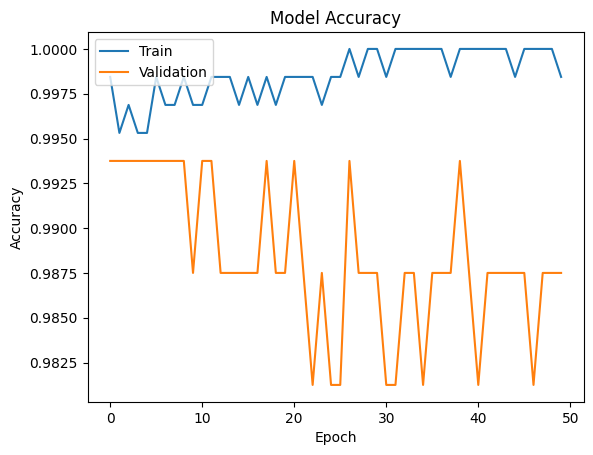

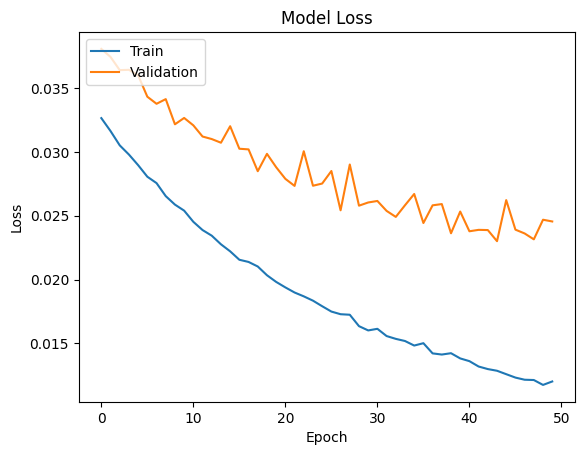

In [5]:
import matplotlib.pyplot as plt

# After training the model, get the history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
